# Data Visualization

## 1. Preprocessing phase:

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/state_weather_aqi_data_mf2.csv') #, sep =','
# Print the first 5 rows of the dataset
df.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5


In [48]:
# Print the shape of the dataset
print(df.shape)

# Print the summary statistics of the dataset
df.describe()

(1565, 14)


,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,182.016613,146.513099,46.641534,8.566134,16.426198,51.463898,30.003195,188.400639
std,104.352717,71.436006,30.414232,5.119818,11.949508,27.553078,21.881496,98.924827
min,9.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,92.000000,94.000000,25.000000,4.000000,9.000000,31.000000,14.000000,101.000000
50%,167.000000,135.000000,43.000000,8.000000,14.000000,47.000000,26.000000,175.000000
75%,277.000000,197.000000,62.000000,12.000000,20.000000,66.000000,41.000000,278.000000
max,441.000000,394.000000,247.000000,34.000000,92.000000,200.000000,206.000000,441.000000


As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

In [49]:
# Print the data information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1565 non-null   object
 1   city                   1565 non-null   object
 2   station                1565 non-null   object
 3   date                   1565 non-null   object
 4   time                   1565 non-null   object
 5   PM2.5                  1565 non-null   int64 
 6   PM10                   1565 non-null   int64 
 7   NO2                    1565 non-null   int64 
 8   NH3                    1565 non-null   int64 
 9   SO2                    1565 non-null   int64 
 10  CO                     1565 non-null   int64 
 11  OZONE                  1565 non-null   int64 
 12  AQI                    1565 non-null   int64 
 13  Predominant_Parameter  1565 non-null   object
dtypes: int64(8), object(6)
memory usage: 171.3+ KB


In [50]:
# Check for missing values in the dataset
df.isnull().sum()

state                    0
city                     0
station                  0
date                     0
time                     0
PM2.5                    0
PM10                     0
NO2                      0
NH3                      0
SO2                      0
CO                       0
OZONE                    0
AQI                      0
Predominant_Parameter    0
dtype: int64

drop the useless columns (in this case)

In [51]:
#drop the non important values 
df.drop(['state', 'station', 'date', 'time', 'Predominant_Parameter'], axis = 1, inplace = True)

df.head()

,city,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,Amaravati,68,64,17,4,28,31,40,68
1,Rajamahendravaram,67,70,23,2,13,49,77,77
2,Tirupati,32,64,26,5,6,19,16,32
3,Visakhapatnam,93,93,31,3,9,57,61,93
4,Amaravati,60,55,20,5,18,29,53,60


In [52]:
df.columns.unique()

Index(['city', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI'], dtype='object')

In [53]:
# Print the data types of the columns in the datase
df.dtypes

city     object
PM2.5     int64
PM10      int64
NO2       int64
NH3       int64
SO2       int64
CO        int64
OZONE     int64
AQI       int64
dtype: object

In [54]:
# feature transformation
# city
# Methode LabelEncoder 
from sklearn.preprocessing import LabelEncoder 

df['city'] = LabelEncoder().fit_transform(df['city'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city    1565 non-null   int32
 1   PM2.5   1565 non-null   int64
 2   PM10    1565 non-null   int64
 3   NO2     1565 non-null   int64
 4   NH3     1565 non-null   int64
 5   SO2     1565 non-null   int64
 6   CO      1565 non-null   int64
 7   OZONE   1565 non-null   int64
 8   AQI     1565 non-null   int64
dtypes: int32(1), int64(8)
memory usage: 104.1 KB


In [55]:
df.head()

,city,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,4,68,64,17,4,28,31,40,68
1,86,67,70,23,2,13,49,77,77
2,100,32,64,26,5,6,19,16,32
3,106,93,93,31,3,9,57,61,93
4,4,60,55,20,5,18,29,53,60


## 2. Visualization phase:

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

The first step is to visualize the distribution of the target variable (AQI)

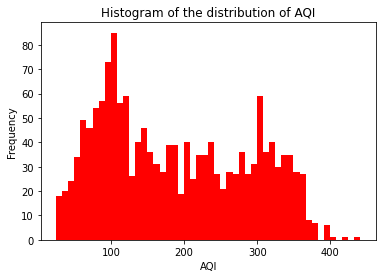

In [56]:
# histogram : numerical

plt.hist(df['AQI'], bins=50, color="red")
plt.xlabel('AQI')
plt.title("Histogram of the distribution of AQI")
plt.ylabel('Frequency')
plt.show()


<Figure size 1440x1440 with 0 Axes>

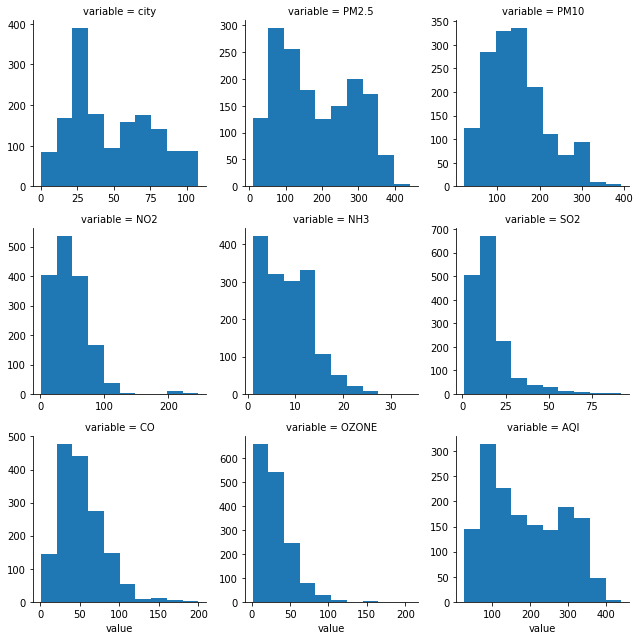

In [57]:
# distribution of all the variables
plt.figure(figsize=[20,20])
f = pd.melt(df)
facet=sns.FacetGrid(data=f, col="variable", col_wrap=3, sharex=False, sharey=False)

facet=facet.map(plt.hist,"value")


Visualize the correlation between numerical variables and the target

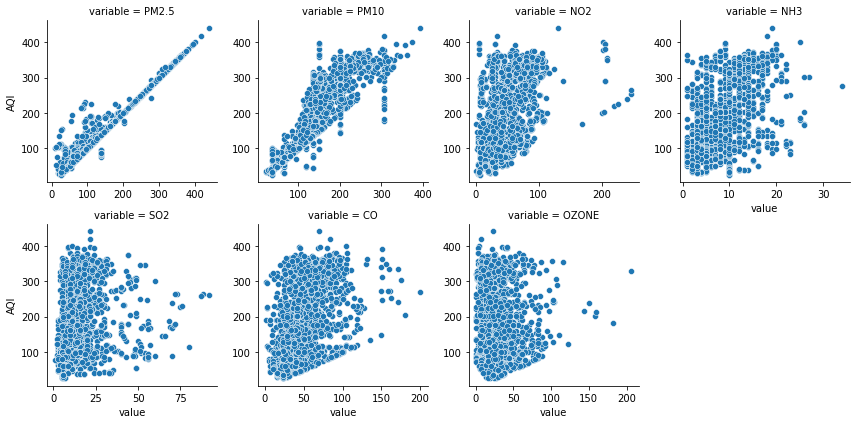

In [60]:
df_numerical = df.drop('city', axis=1)
 
f = pd.melt(df_numerical, id_vars=["AQI"],value_vars= df_numerical.columns)
facet=sns.FacetGrid(data=f,col="variable",col_wrap=4,sharex=False,sharey=False)
facet=facet.map(sns.scatterplot,"value","AQI")

Now let's visualize the correlations between the city and AQI, we use a bar plot with the groupby function combined with the mean() to view the relation between city and AQI. 


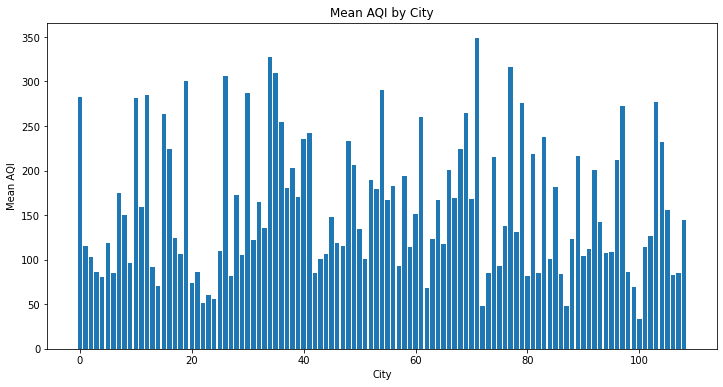

In [67]:
# Calculate the mean AQI values for each city
city_aqi = df.groupby('city')['AQI'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
plt.bar(city_aqi.index, city_aqi.values)
plt.xlabel('City')
plt.ylabel('Mean AQI')
plt.title('Mean AQI by City')
plt.show()

Have a look at this function:

Try running the function, analyze what it does exactly and its utilities. Write a paragraph describing your analysis (the paragraph should be in English).

In [61]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )


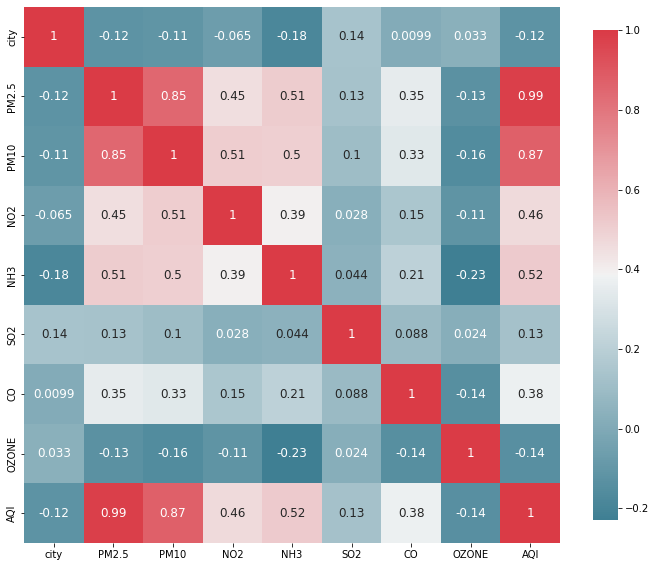

In [62]:
plot_correlation_map(df)

The function plot_correlation_map(df) creates a color-coded heatmap that visualizes the correlation between all pairs in the input dataFrame df. 

The function is useful for identifying patterns and relationships between different variables in a dataset. Correlation coefficients can range from -1 to 1, with negative values indicating a negative correlation (as one variable goes up, the other goes down), positive values indicating a positive correlation (as one variable goes up, the other also goes up), and values close to zero indicating a weak or no correlation.

By visualizing the correlations between different variables in a dataset, we can understand the relationships between the variables and it can guide us to feature selection in machine learning models.